In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.4 MB/s eta 0:13:52tcmalloc: large alloc 1147494400 bytes == 0x398ac000 @  0x7f8a66bbc615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████████████████               | 1055.7 MB 1.4 MB/s eta 0:11:09tcmalloc: large alloc 1434370048 bytes == 0x7df02000 @  0x7f8a66bbc615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████

In [ ]:
!pip install transformers requests beautifulsoup4 pandas numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.0 MB/s 
     |████████████████████████████████| 7.6 MB 45.0 MB/s 
     |████████████████████████████████| 163 kB 56.4 MB/s 


Transformers provides APIs and tools to easily download and train state-of-the-art pretrained models. Using pretrained models can reduce your compute costs, carbon footprint, and save you the time and resources required to train a model from scratch.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch # used for tensor computation
import requests #The requests module allows you to send HTTP requests using Python.
from bs4 import BeautifulSoup #Beautiful Soup is a Python library for pulling data out of HTML and XML files
import re # "re" module provides regular expression support.
import numpy as np
import pandas as pd

In [ ]:
# Loading the pretrained model
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
# Input sentence for test
tokens = tokenizer.encode('What if I dont want it?', return_tensors='pt')

In [ ]:
result = model(tokens)

In [ ]:
result.logits

tensor([[ 0.8439,  0.6031,  0.4050, -0.6722, -1.0388]],
       grad_fn=<AddmmBackward>)

In [ ]:
int(torch.argmax(result.logits))+1
sentiment ="Neutral"
if int(torch.argmax(result.logits))+1 > 3: 
      sentiment ="Yes"
elif int(torch.argmax(result.logits))+1 !=3 and int(torch.argmax(result.logits))+1 < 3:
      sentiment = "No"


sentiment

'No'

In [ ]:
# Scraping results from a website
r = requests.get('https://www.yelp.com/biz/golden-gate-dental-san-francisco?osq=dentist')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [ ]:
reviews

['Friendly and accommodating staff, good dentists and open 7 days a week.I am very pleased with the service I got from Dr. Thomas Habelt and his assistant Jennifer.They were very kind and did a great job with my crown; no pain, no rush job, I was shown and explained what was going on thru the process which is important to me, and the fitting was good on the first try. There was nothing to complain about, overall experience was smooth, simple, painless and done right. Thank you Thomas and Jennifer!! Thank you Golden Gate Dental!',
 "My relationship with going to the Dentist is complex, like most of ours. I've always struggled with having abnormal trouble with my teeth despite taking care of them, so having the right kind of care is really important to me. So naturally I did A lot of research as to who could be that form of careful and critical care for my teeth help.I'm so lucky that let me to Dr. Natalya Komissarova. She has been nothing short of spectacular -- thorough and checking on

In [ ]:
df = pd.DataFrame(np.array(reviews), columns=['review'])
df['review'].iloc[0]

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    sentiment = "Neutral"
    if int(torch.argmax(result.logits))+1 > 3: 
      sentiment ="Yes"
    elif int(torch.argmax(result.logits))+1 !=3 && int(torch.argmax(result.logits))+1 < 3:
      sentiment = "No"
    return sentiment
sentiment_score(df['review'].iloc[1])

df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

# df['review'].iloc[3]

In [ ]:
df

,review,sentiment
0,"Friendly and accommodating staff, good dentist...",5
1,My relationship with going to the Dentist is c...,4
2,Thank you Nellie for your wonderful review. We...,5
3,Dr. Komissarova and Golden Gate Dental have ch...,4
4,"Been going to Dr Natalya for 5 years now, even...",4
5,Awesome customer service and very good doctors...,5
6,DO NOT GO HERE or at the very least get a 2nd ...,1
7,I really appreciate this practice and the team...,5
8,I have lived in the city my whole life and GGD...,3
9,"Dr. Young and his assistant have great hands, ...",5


4.25

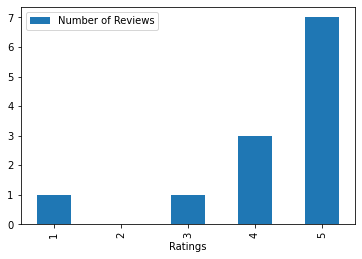

In [ ]:
import matplotlib.pyplot as plt
add = 0
one=two=three=four=five=0
for i in range(0, len(df.sentiment)):
  add = df['sentiment'].iloc[i] + add
  if df['sentiment'].iloc[i] == 1:
    one+=1
  if df['sentiment'].iloc[i] == 2: two+=1
  if df['sentiment'].iloc[i] == 3:three+=1
  if df['sentiment'].iloc[i] == 4:four+=1
  if df['sentiment'].iloc[i] == 5:five+=1
avg_rating = add/len(df.sentiment)
graph_data = {'Ratings': [1,2,3,4,5],
    'Number of Reviews':[one, two, three, four, five]
}
df_graph = pd.DataFrame(graph_data, columns=['Ratings','Number of Reviews'])
df_graph.plot(x='Ratings', y='Number of Reviews', kind ='bar')
avg_rating
